In [107]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
#%pylab tk #pour avoir les plots dans une nouvelle fenetre

In [108]:
np.random.seed(0)
def f_target(x):
    return 2 * x * np.sin(x)

N = 20
a = 0#-np.pi/2
b = 3*np.pi/2
Xs = (b-a) * np.random.rand(N) + a
Ys = np.array([f_target(x) + np.random.randn() for x in Xs])
Xs

array([2.58622271, 3.37025049, 2.84045549, 2.56770151, 1.99642621,
       3.0437043 , 2.06208115, 4.20238126, 4.54115377, 1.80692559,
       3.73091634, 2.49235859, 2.67684693, 4.3617714 , 0.33474954,
       0.41058715, 0.09527695, 3.92362859, 3.6669773 , 4.09983566])

In [109]:
# def f_target(x):
#     return 2 * x * np.sin(x)

array([2.58622271, 3.37025049, 2.84045549, 2.56770151, 1.99642621,
       3.0437043 , 2.06208115, 4.20238126, 4.54115377, 1.80692559,
       3.73091634, 2.49235859, 2.67684693, 4.3617714 , 0.33474954,
       0.41058715, 0.09527695, 3.92362859, 3.6669773 , 4.09983566])

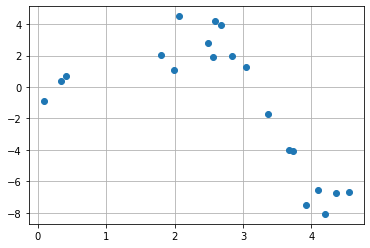

In [110]:
# N = 20 #nombre d'exemples du jeu de données
# a = 0 #début de l'intervalle des x
# b = 3*np.pi/2 #fin de l'intervalle des x
# np.random.seed(0)
# Xs = (b-a) * np.random.rand(N) + a
# Ys = [f_target(x) + np.random.randn() for x in Xs]
plt.plot(Xs,Ys, 'o') #plot des points generes
plt.grid()
Xs

In [111]:
#Question 1:
def flin(x, theta1, theta0):
    return theta1*x + theta0
Ys

array([ 4.22129065, -1.73303098,  1.99806219,  1.93393466,  1.08361567,
        1.24855381,  4.50082335, -8.07734368, -6.67972454,  2.05920395,
       -4.10152006,  2.82645891,  3.93228076, -6.72345037,  0.37489971,
        0.70593239, -0.86965781, -7.51095738, -4.02622635, -6.55247971])

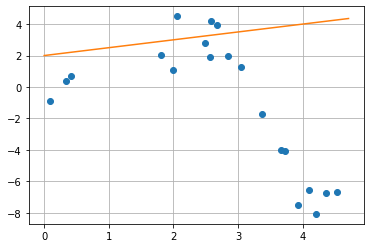

In [112]:
#Question 2:
theta1 = 0.5
theta0 = 2

nbpts = 40
xspace = np.linspace(a, b, nbpts)

plt.plot(Xs,Ys, 'o')
plt.plot(xspace, [flin(x, theta1, theta0) for x in xspace])
plt.grid()

In [113]:
#Question 3:
def erreur_quad(f, Xs, Ys):
    s = 0
    for i in range(len(Xs)):
        s += (f(Xs[i]) - Ys[i])**2
    return s / len(Xs)

ftest = lambda x : flin(x, theta1, theta0)
erreur_quad(ftest, Xs, Ys)

40.83416973976079

In [114]:
#Question 4:
theta1 = -1
theta0 = 2

ftest = lambda x : flin(x, theta1, theta0)
erreur_quad(ftest, Xs, Ys)

12.179063480576541

theta_1:  -2.034835472398463 , theta_2:  4.507025401607631 , erreur quadratique moyenne:  10.260445732516947


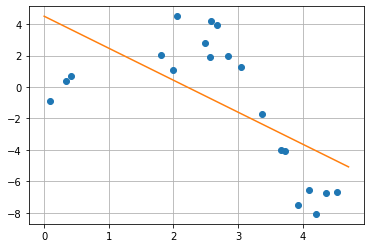

In [115]:
#Question 5:
xbar = np.mean(Xs)
ybar = np.mean(Ys)

theta1opt = np.sum([(Xs[i] - xbar) * (Ys[i] - ybar) for i in range(len(Xs))])
theta1opt /= np.sum([(x - xbar)**2 for x in Xs])
theta0opt = ybar - theta1opt * xbar

ftest = lambda x : flin(x, theta1opt, theta0opt)
e = erreur_quad(ftest, Xs, Ys)

print("theta_1: ", theta1opt, ', theta_2: ', theta0opt, 
      ', erreur quadratique moyenne: ', e)
plt.plot(Xs, Ys, 'o')
plt.plot(xspace, [flin(x, theta1opt, theta0opt) for x in xspace])
plt.grid()

In [116]:
#Question 6:
def fpoly(x, theta):
    '''fonction qui calcule l'image de x par le polynôme de paramètre theta, 
    dont les éléments correspondent aux coefficients du polynôme triés
    par ordre décroissant de degré.'''
    s = 0
    xpow = 1
    for i in range(len(theta)):
        s += theta[-1-i] * xpow
        xpow *= x
    return s
        
def plot_poly(theta, a, b, label=""):
    '''Trace la courbe du polynôme de paramètre theta entre a et b.'''
    xspace = np.linspace(a, b, 40)
    plt.plot(xspace, [fpoly(x, theta) for x in xspace], label=label)

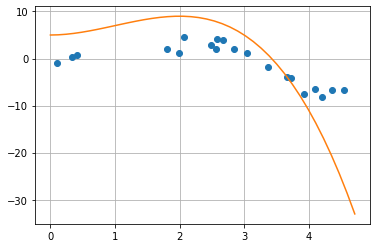

In [117]:
plt.plot(Xs, Ys, 'o')
plot_poly([-1,3,0,5], a, b)
plt.grid()

Degré  2 , erreur quadratique moyenne:  2.099429067826882
Degré  5 , erreur quadratique moyenne:  0.6733207813808548
Degré  10 , erreur quadratique moyenne:  0.6001183458769973
Degré  20 , erreur quadratique moyenne:  0.13915945536679483


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


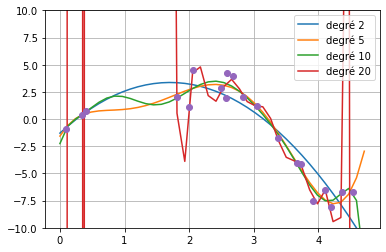

In [118]:
#Question 7:
degs = [2,5,10,20]
for d in degs:
    theta = np.polyfit(Xs,Ys,d)
    ftest = lambda x : fpoly(x, theta)
    print("Degré ", d, ", erreur quadratique moyenne: ", erreur_quad(ftest, Xs, Ys))
    plot_poly(theta, a, b, label ="degré "+str(d))
plt.plot(Xs, Ys, 'o')
plt.ylim(-10,10)
plt.grid()
plt.legend()

Degré  2 , erreur quadratique moyenne:  2.099429067826882


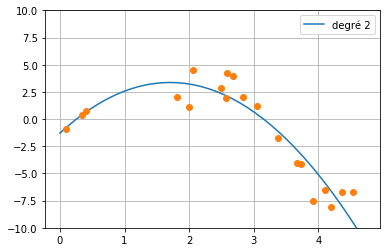

In [119]:
#Question 7:
d = 2
theta = np.polyfit(Xs,Ys,d)
ftest = lambda x : fpoly(x, theta)
print("Degré ", d, ", erreur quadratique moyenne: ", erreur_quad(ftest, Xs, Ys))
plot_poly(theta, a, b, label ="degré "+str(d))
plt.plot(Xs, Ys, 'o')
plt.ylim(-10,10)
plt.grid()
plt.legend()

Degré  5 , erreur quadratique moyenne:  0.6733207813808548


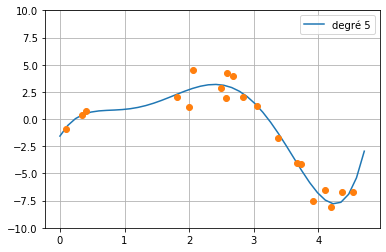

In [120]:
#Question 7:
d = 5
theta = np.polyfit(Xs,Ys,d)
ftest = lambda x : fpoly(x, theta)
print("Degré ", d, ", erreur quadratique moyenne: ", erreur_quad(ftest, Xs, Ys))
plot_poly(theta, a, b, label ="degré "+str(d))
plt.plot(Xs, Ys, 'o')
plt.ylim(-10,10)
plt.grid()
plt.legend()

Degré  10 , erreur quadratique moyenne:  0.6001183458769973


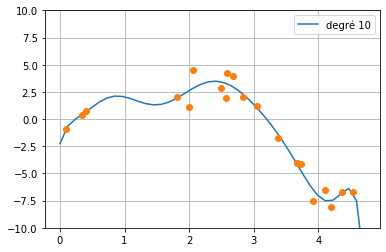

In [121]:
#Question 7:
d = 10
theta = np.polyfit(Xs,Ys,d)
ftest = lambda x : fpoly(x, theta)
print("Degré ", d, ", erreur quadratique moyenne: ", erreur_quad(ftest, Xs, Ys))
plot_poly(theta, a, b, label ="degré "+str(d))
plt.plot(Xs, Ys, 'o')
plt.ylim(-10,10)
plt.grid()
plt.legend()

Degré  20 , erreur quadratique moyenne:  0.13915945536679483


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


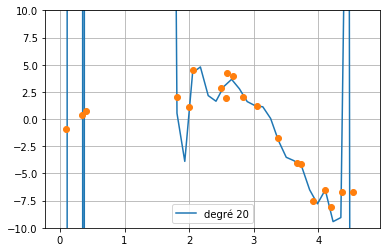

In [122]:
#Question 7:
d = 20
theta = np.polyfit(Xs,Ys,d)
ftest = lambda x : fpoly(x, theta)
print("Degré ", d, ", erreur quadratique moyenne: ", erreur_quad(ftest, Xs, Ys))
plot_poly(theta, a, b, label ="degré "+str(d))
plt.plot(Xs, Ys, 'o')
plt.ylim(-10,10)
plt.grid()
plt.legend()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


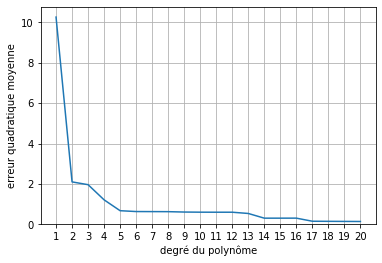

In [123]:
fig, ax = plt.subplots()
degs = np.arange(1,21)
erreurs = []
for d in degs:
    theta = np.polyfit(Xs,Ys,d)
    ftest = lambda x : fpoly(x, theta)
    erreurs.append(erreur_quad(ftest, Xs, Ys))
plt.plot(degs, erreurs)
plt.ylim(bottom=0)
ax.xaxis.set_ticks(degs)
plt.xlabel("degré du polynôme")
plt.ylabel("erreur quadratique moyenne")
plt.grid()

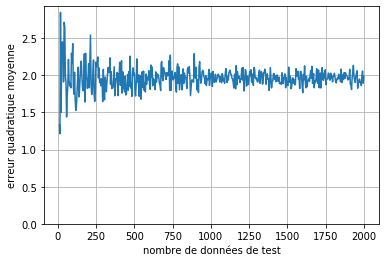

In [124]:
#Question 9:
N2range = np.linspace(10, 2000, 500)
N2range = [int(N2) for N2 in N2range]

#solution pour degré 10:
theta = np.polyfit(Xs,Ys,10)
ftest = lambda x: fpoly(x, theta)

erreurs = []
for N2 in N2range:
    Xstest = (b-a) * np.random.rand(N2) + a
    Ystest = [f_target(x) + np.random.randn() for x in Xstest]
    erreurs.append(erreur_quad(ftest, Xstest, Ystest))
plt.plot(N2range, erreurs)
plt.ylim(bottom=0)
ax.xaxis.set_ticks(N2range)
plt.xlabel("nombre de données de test")
plt.ylabel("erreur quadratique moyenne")
plt.grid()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


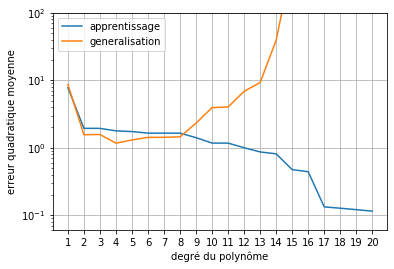

In [125]:
#Question 10:
N = 20 #nombre d'exemples du jeu de données
Xs = (b-a) * np.random.rand(N) + a
Ys = [f_target(x) + np.random.randn() for x in Xs]

fig, ax = plt.subplots()
degs = np.arange(1,21)

N2 = 1000
Xstest = (b-a) * np.random.rand(N2) + a
Ystest = [f_target(x) + np.random.randn() for x in Xstest]

erreurs = []
erreursgeneral = []
for d in degs:
    theta = np.polyfit(Xs,Ys,d)
    ftest = lambda x : fpoly(x, theta)
    erreurs.append(erreur_quad(ftest, Xs, Ys))
    erreursgeneral.append(erreur_quad(ftest, Xstest, Ystest))
plt.plot(degs, erreurs, label="apprentissage")
plt.semilogy(degs, erreursgeneral, label="generalisation")
plt.ylim(0, 100)
ax.xaxis.set_ticks(degs)
plt.xlabel("degré du polynôme")
plt.ylabel("erreur quadratique moyenne")
plt.grid()
plt.legend()

In [126]:
#Question 11:
d = 12

#Nrange = np.linspace(10, 200, 200)
Nrange = np.arange(10, 250)
Nrange = [int(N) for N in Nrange]

N2 = 200
Xstest = (b-a) * np.random.rand(N2) + a
Ystest = [f_target(x) + np.random.randn() for x in Xstest]

erreurs = []
erreursgeneral = []
for N in Nrange:
    Xs = (b-a) * np.random.rand(N) + a
    Ys = [f_target(x) + np.random.randn() for x in Xs]
    
    theta = np.polyfit(Xs,Ys,d)
    ftest = lambda x: fpoly(x, theta)

    erreurs.append(erreur_quad(ftest, Xs, Ys))
    erreursgeneral.append(erreur_quad(ftest, Xstest, Ystest))

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  This is separate from the ipykernel package so we can avoid doing imports until


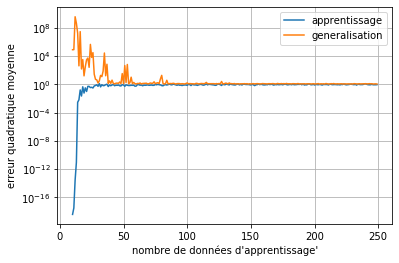

In [127]:
plt.semilogy(Nrange, erreurs, label="apprentissage")
plt.plot(Nrange, erreursgeneral, label="generalisation")
plt.ylim(bottom=0)
ax.xaxis.set_ticks(N2range)
plt.xlabel("nombre de données d'apprentissage'")
plt.ylabel("erreur quadratique moyenne")
plt.legend()
plt.grid()

In [128]:
#Question 12:

#Nrange = np.linspace(10, 200, 200)
Nrange = np.arange(10, 1000, 10)

N2 = 200
Xstest = (b-a) * np.random.rand(N2) + a
Ystest = [f_target(x) + np.random.randn() for x in Xstest]

erreurs = []
erreursgeneral = []
for N in Nrange:
    d = int(N**0.5) #choix de scaling. On peut en choisir d'autres
    Xs = (b-a) * np.random.rand(N) + a
    Ys = [f_target(x) + np.random.randn() for x in Xs]
    
    theta = np.polyfit(Xs,Ys,d)
    ftest = lambda x: fpoly(x, theta)

    erreurs.append(erreur_quad(ftest, Xs, Ys))
    erreursgeneral.append(erreur_quad(ftest, Xstest, Ystest))

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly co

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  This is separate from the ipykernel package so we can avoid doing imports until


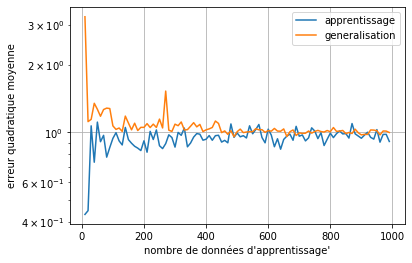

In [129]:
plt.semilogy(Nrange, erreurs, label="apprentissage")
plt.plot(Nrange, erreursgeneral, label="generalisation")
plt.ylim(bottom=0)
ax.xaxis.set_ticks(N2range)
plt.xlabel("nombre de données d'apprentissage'")
plt.ylabel("erreur quadratique moyenne")
plt.legend()
plt.grid()

In [130]:
# TP2 

n = 20
np.random.seed(0)
a = 0
b = np.pi * 3 / 2
# def f(x):
#     return 2 * x - 1

Xs = (b-a) * np.random.rand(n) + a
Ys = [f_target(x) + np.random.randn() for x in Xs]
Ys

[4.221290647946067,
 -1.7330309772916983,
 1.9980621892323476,
 1.9339346631039693,
 1.083615672420513,
 1.2485538079408487,
 4.500823345576649,
 -8.077343681793677,
 -6.679724537045441,
 2.059203952704663,
 -4.101520058056569,
 2.826458905535846,
 3.9322807598492187,
 -6.723450368047985,
 0.3748997114925718,
 0.705932393888648,
 -0.869657807704889,
 -7.510957381536317,
 -4.026226346166303,
 -6.552479706162948]

In [131]:
def g1(theta1, theta0):
    ftest = lambda x : flin(x, theta1, theta0)  
    return erreur_quad(ftest, Xs, Ys)
# a = 0.975
b = 2
nbPoint = 40
maxval = np.inf
tspace1 = np.linspace(-5, 5, nbPoint)
tspace0 = np.linspace(-2, 5, nbPoint)
# Y2s = [g1(t, a) for t in tspace1]
Y3s = [g1(t, b) for t in tspace0]


In [132]:
g1(0, 0)

18.40411036299448

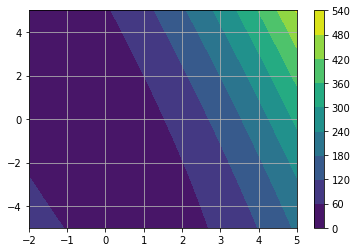

In [133]:
# %pylab nbagg
fig, ax = plt.subplots()

t0, t1 = np.meshgrid(tspace0, tspace1)
Z = [[min(maxval, g1(t0, t1)) for t0 in tspace0]for t1 in tspace1]
contours = plt.contourf(t0, t1, Z)
cbar = fig.colorbar(contours)
plt.grid()

40.34693533215061

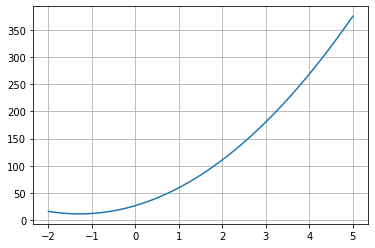

In [134]:
plt.plot(tspace0, Y3s, label="data")
# 
plt.grid()
# 
g1(1, 0)

In [135]:
def grad(t1, t0, Xk, Yk):
    N = len(Xk)
    return np.array([2 / N * (np.sum([Xk[i] * (t1 * Xk[i] + t0 - Yk[i]) for i in range(N)]) ),
                     2 / N * (np.sum([(t1 * Xk[i] + t0 - Yk[i]) for i in range(N)]))])

In [136]:
grad(t1, t0, Xs, Ys)

array([33541.41112603,  8222.29357026])

In [137]:
Xs

array([2.58622271, 3.37025049, 2.84045549, 2.56770151, 1.99642621,
       3.0437043 , 2.06208115, 4.20238126, 4.54115377, 1.80692559,
       3.73091634, 2.49235859, 2.67684693, 4.3617714 , 0.33474954,
       0.41058715, 0.09527695, 3.92362859, 3.6669773 , 4.09983566])

In [138]:
Ys

[4.221290647946067,
 -1.7330309772916983,
 1.9980621892323476,
 1.9339346631039693,
 1.083615672420513,
 1.2485538079408487,
 4.500823345576649,
 -8.077343681793677,
 -6.679724537045441,
 2.059203952704663,
 -4.101520058056569,
 2.826458905535846,
 3.9322807598492187,
 -6.723450368047985,
 0.3748997114925718,
 0.705932393888648,
 -0.869657807704889,
 -7.510957381536317,
 -4.026226346166303,
 -6.552479706162948]

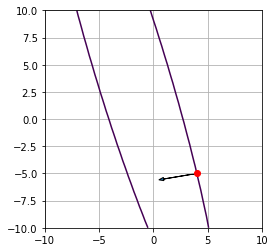

In [139]:
tspace1 = np.linspace(-10, 10, nbPoint)
tspace0 = np.linspace(-10, 10, nbPoint)
t0, t1 = np.meshgrid(tspace0, tspace1)
Z = [[min(maxval, g1(t0, t1)) for t0 in tspace0]for t1 in tspace1]

theta0 = [4, -5]
THEgradient = -grad(t0, t1, Xs, Ys)
THEgradient = THEgradient * 0.00015
plt.contour(t0, t1, Z, levels = [g1(theta0[0], theta0[1])])
plt.plot(theta0[0], theta0[1], "ro")
plt.arrow(theta0[0], 
          theta0[1],
          THEgradient[0],
          THEgradient[1],
          head_width=0.3)
plt.gca().set_aspect('equal')

plt.grid()

In [140]:
grad(0, 0, Xs, Ys)

array([12.74184431,  2.13893348])

In [141]:
def grad2(theta, xs=Xs, ys=Ys):
    N = len(xs)
    return np.array([2/N * np.sum([xs[k] * (theta[0]*xs[k] + theta[1] - ys[k]) for k in range(N)]),
                     2/N * np.sum([theta[0]*xs[k] + theta[1] - ys[k] for k in range(N)])])
grad2([0, 0])

array([12.74184431,  2.13893348])

In [142]:
g1(0, 0)

18.40411036299448